### Inititalize modules and variable

In [1]:
import pprint, math, matplotlib.pyplot as plt
from collections import defaultdict, deque

%matplotlib inline
pp = pprint.PrettyPrinter(depth=6)
inventory = {}
warehouses = {}
orders = {}
drone_locations = {}

### Read input from files

In [2]:
#out = open('result.out')

with open('input/example.in', 'r') as f:     
    rows, cols, no_drones, simulation_deadline, max_load = map(int, f.next().strip().split(' '))
    no_product_types = int(f.next())
    product_type_weights = f.next().strip().split()
    no_of_warehouse = int(f.next())

    for T in range(no_product_types):
        inventory[T] = product_type_weights[T]

    for warehouse in range(no_of_warehouse):
        location = tuple(map(int, f.next().strip().split(' ')))
        items = map(int, f.next().strip().split(" "))
        warehouses[location] = items
        drone_locations[warehouse] = location
        
    no_of_orders = int(f.next())
    for order in range(no_of_orders):
        location = tuple(map(int, f.next().strip().split(' ')))
        values = {'count': int(f.next()), 'orders': map(int, f.next().strip().split(' '))}
        orders[location] = values
        

In [3]:
pp.pprint(warehouses)

{(0, 0): [5, 1, 0], (5, 5): [0, 10, 2]}


In [4]:
pp.pprint(inventory)

{0: '100', 1: '5', 2: '450'}


In [5]:
pp.pprint(orders)

{(1, 1): {'count': 2, 'orders': [2, 0]},
 (3, 3): {'count': 3, 'orders': [0, 0, 0]},
 (5, 6): {'count': 1, 'orders': [2]}}


### Create a Network of Nodes (Orders and Warehouse Locations)

(5, 6) (5, 6) {'weight': 0.0}
(5, 6) (3, 3) {'weight': 4.0}
(5, 6) (0, 0) {'weight': 8.0}
(5, 6) (5, 5) {'weight': 1.0}
(5, 6) (1, 1) {'weight': 6.0}
(3, 3) (3, 3) {'weight': 0.0}
(3, 3) (0, 0) {'weight': 4.0}
(3, 3) (5, 5) {'weight': 3.0}
(3, 3) (1, 1) {'weight': 3.0}
(0, 0) (0, 0) {'weight': 0.0}
(0, 0) (5, 5) {'weight': 7.0}
(0, 0) (1, 1) {'weight': 1.0}
(5, 5) (5, 5) {'weight': 0.0}
(5, 5) (1, 1) {'weight': 6.0}
(1, 1) (1, 1) {'weight': 0.0}


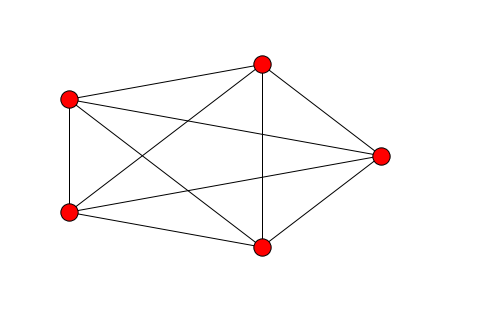

In [13]:
import networkx as nx
from itertools import product


def draw_graph(nodes, graph):

    G=nx.Graph()
    G.add_weighted_edges_from(graph)
    
    for line in nx.generate_edgelist(G, data=True):
        print line
    
    # draw graph
    pos = nx.shell_layout(G)
    nx.draw(G, pos)
    
    plt.show()

nodes = warehouses.keys() + orders.keys()
graph = [(A,B,round(math.sqrt((A[0]-B[0])**2 + (A[1]-B[1])**2))) for A,B in list(product(nodes,nodes))]
draw_graph(nodes, graph)

#### Create a Drone class with methods

In [7]:
class Drone(object):
    def __init__(self):
        self.max_load = max_load
        self.turns_taken = 0
        self.distance_travelled = 0
        self.inventory = []

    def load(self):
        self.turns_taken += 1
        
    def unload(self):
        self.turns_taken += 1

    def deliver(self):
        self.turns_taken += 1
        
    def wait(self):
        self.turns_taken += 1
drones = [Drone() for i in range(no_drones)]

In [8]:
for key, order in orders.iteritems():
    order_w = [int(inventory[i]) for i in order['orders']]
    if sum(order_w) < max_load:
        print order

{'count': 1, 'orders': [2]}
{'count': 3, 'orders': [0, 0, 0]}


In [9]:
def simulation():
    pass